# Machine Learning for Business Analytics tutorial
# Chapter 12: Least squares

###  CH12.1 Least squares problem

$Ax = b$: over-determined, i.e., cannot find a solution to this system.

Instead, we find $x$ to minimize $||Ax  - b||^2$ (minimize the (2-)norm of residual)

In [4]:
# Data
A = [ 2 0 ; -1 1 ; 0 2 ]
# target variable
b = [ 1, 0, -1 ]
# parameter (weight for features)
xhat = [ 1/3, -1/3 ]

2-element Vector{Float64}:
  0.3333333333333333
 -0.3333333333333333

In [5]:
# residuals
rhat = A*xhat - b
using LinearAlgebra
norm(rhat)

0.816496580927726

In [6]:
# another parameter value
x = [ 1/2, -1/2 ]
r = A*x -b
norm(r)

1.0

So, we aim to find the parameter $x$ that minimize $norm(residual)$

### 12.2 Solution

##### Least squares solution formula

In [233]:
# using formula from partial derivative
inv(A'*A)*A'*b
# using pseudo-inverse
pinv(A)*b

2-element Vector{Float64}:
  0.33333333333333337
 -0.33333333333333337

In [13]:
(A'*A)*xhat - A'*b  # Check that normal equations hold

2-element Vector{Float64}:
 -2.220446049250313e-16
  2.220446049250313e-16

##### Orthogonality principle

For any $n$-vector $z$, we have $Az \perp \hat{r}$

In [19]:
z = [-1.1, 2.3]
println((A*z)'*rhat)
z = [5.3, -1.2]
println((A*z)'*rhat)

2.220446049250313e-16
-6.661338147750939e-16


### 12.3 Solving least squares problems
We will talk about 4 methods here to find $x$ to solve for $||Ax = b||^2$

In [7]:
A = randn(100,20);  b = randn(100);

The backslash operator $A$\ $b$ means $A^\dagger b$

In [8]:
x1 = A\b;  # Least squares using backslash operator
x2 = inv(A'*A)*(A'*b);  # Using formula
x3 = pinv(A)*b;  # Using pseudo-inverse

In [9]:
Q, R = qr(A);
Q = Matrix(Q);
x4 = R\(Q'*b);  # Using QR factorization

##### Complexity

minimization: $2mn^2$ flops

matrix-vector multiplication: $2mn$ flops

total flops $\approx 2mn^2$

The complexity is linear in the row dimension of A and quadratic in the number of variables.

In [13]:
m = 2000; n = 500;
A = randn(m,n); b = randn(m);
@time x1 = A\b;

  0.079646 seconds (3.03 k allocations: 11.875 MiB, 4.91% gc time)


==> doubling $m$ roughly double the running time

In [14]:
m = 2000; n = 1000;
A = randn(m,n); b = randn(m);
@time x1 = A\b; 

  0.199008 seconds (6.03 k allocations: 31.312 MiB, 4.43% gc time)


==> doubling $n$ roughly increases it $2^2= 4$ times

##### Matrix least squares.
Note: the matrix norm here is in terms of the Frobenius norm, which is defined as $||X||_{F}^2 = \sum_{i = 1}^N \sum_{j = 1}^M x_{ij}^2$.

minimize$_X$ $||AX  - B||^2$

Therefore, we have that $||AX  - B||^2 = ||Ax_{1}  - b_1||^2 + \dots + ||Ax_{k}  - b_{k}||^2$

==> The same as finding the minimization problem for multiple times (over the columns of $X$ and columns of $b$)

Choose the $n  \times k$  matrix $X$ to minimize $||AX  - B||^2$ with $A$ being $m \times n$ matrix and $B$ being $m \times k$ matrix

In [237]:
A = randn(1000,100); 
B = randn(1000,10); # was a vector then, but now a matrix
X = A\B;
# Check that third column of X is least squares solution
# with third column of B
x3 = A\B[:,3];
norm(X[:,3]-x3) 

1.5126310634459248e-16

X[:,3]: calculate them together using matrix least square 

vs. x3: the normal vector form least square

### 12.4 Examples

$m$ demographic groups

$n$ different channels (say, different web publishers, radio, print, . . . )

$R_{ij}$ means the money group $i$ spent on marketing channel $j$

In [195]:
R = [ 0.97  1.86  0.41;
             1.23  2.18  0.53;
             0.80  1.24  0.62;
             1.29  0.98  0.51;
             1.10  1.23  0.69;
             0.67  0.34  0.54;
             0.87  0.26  0.62;
             1.10  0.16  0.48;
             1.92  0.22  0.71;
             1.29  0.12  0.62];

In [196]:
m, n = size(R);

In [197]:
vdes = 1e3 * ones(m); # the goal for each group is 1000

want find $s$ to minimize $||Rs - v^{des}||^2$

In [198]:
s = R \ vdes;

In [199]:
R * s

10-element Vector{Float64}:
  837.7497929420039
 1059.0254121173957
 1068.2019314056834
  913.911255505288
 1186.8236911064416
  854.7184695862493
  974.5619911760563
  776.8438696625446
 1165.5984184146794
  986.6362729205171

In [200]:
using VMLS
rms(R*s - vdes)

132.63819026326527

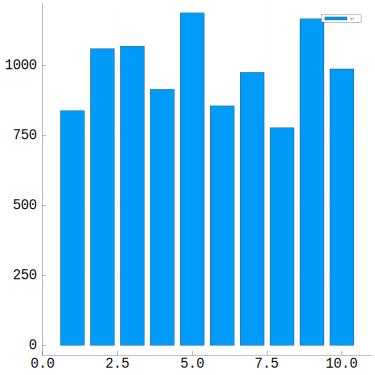

In [207]:
bar(R*s, size = (1500, 1500), xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"))

# Chapter 13 Least squares data fitting

##### 13.1 Least squares data fitting

#### We will be talking about the different model fits
#### 1. Straight-line fit
#### 2. Seasonal-component fit
#### 3. Polynomial fit.
#### 4. Piecewise-linear fit.
#### 5. Autoregressive model fit.



##### 1. Straight-line fit
$\hat{f}(x) = a + b x$, a: intercept, b: slpoe

$consumption = a + b \times year$

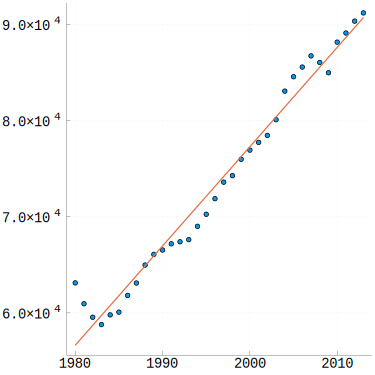

In [300]:
# Petroleum consumption in thousand barrels/day
consumption = petroleum_consumption_data()
n = length(consumption);

A = [ ones(n) 1:n]; # intercept and year (the same as simply using sequence)
x = A \ consumption;
using Plots
scatter(1980:2013, consumption, legend=false, markersize = 10)
plot!(1980:2013, A*x, linewidth = 5,  size = (1500, 1500), xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"))


In [299]:
x # from 1:n

2-element Vector{Float64}:
 55604.93048128342
  1032.5703590527119

In [301]:
x # from 1980:1980 + n

2-element Vector{Float64}:
   -1.9888843804431262e6
 1032.5703590527316

##### 2. Estimation of trend and seasonal component.

In [318]:
vmt = vehicle_miles_data();  # creates 15x12 matrix vmt
m = 15 * 12;

A = [ 0:(m-1)  vcat([eye(12) for i=1:15]...) ]; # time trend + sesonal effect
b = reshape(vmt', m, 1);
x = A \ b;

In [3]:
using Plots
scatter(1:m, b, markersize = 10, legend =false);
plot!(1:m, A*x,linewidth = 3, size = (2000, 2000), xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"))

LoadError: UndefVarError: m not defined

In [317]:
vcat([eye(12) for i=1:15]...)

180×12 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                        ⋮    
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0

##### 3. Polynomial fit.
$\hat{f}(x) = \theta_1 + \theta_2x + \theta_3x^2 + \dots + \theta_px^{p-1}$

So we will naturally use the vandermonde matrix

For example, the vandermonde matrix for $x_0 = [1,2, 3]$ is:

In [332]:
x0 = [1, 2, 3]
vandermonde(x0, 3)

3×3 Matrix{Int64}:
 1  1  1
 1  2  4
 1  3  9

We will use the Vandermonde matrix to create the matrix $A$

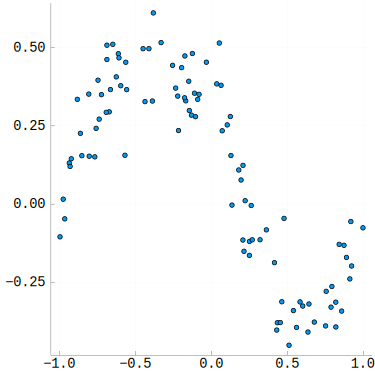

In [328]:
# Generate training data in the interval [-1, 1].
m = 100;
t = -1 .+ 2*rand(m,1);
y = t.^3 - t + 0.4 ./ (1 .+ 25*t.^2) + 0.10*randn(m,1);
using Plots
scatter(t,y,legend=false, size = (1500, 1500), markersize = 10, xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"))

Use the vandermonde matrix 

In [70]:
polyfit(t, y, p) = vandermonde(t, p) \ y
theta2 = polyfit(t,y, 3)   # to the power of 2
theta6 = polyfit(t,y, 7)
theta10 = polyfit(t,y, 11)
theta15 = polyfit(t,y, 16)

16×1 Matrix{Float64}:
     0.37348332892623787
    -0.5343808508602746
    -3.2542029528023493
   -14.730728045553114
     8.207577316452188
   164.03031359678116
    21.423042492991804
  -779.7818964239567
  -162.64157765971103
  1936.4247267913893
   349.5093806287617
 -2593.3244685554837
  -326.2494107491909
  1772.4205576249742
   112.72646074862817
  -484.596736769297

In [330]:
vandermonde(t, 3)

100×3 Matrix{Float64}:
 1.0  -0.758153   0.574797
 1.0  -0.803491   0.645598
 1.0  -0.103979   0.0108116
 1.0  -0.124583   0.0155208
 1.0   0.207907   0.0432254
 1.0  -0.254813   0.0649294
 1.0  -0.648198   0.420161
 1.0  -0.687089   0.472091
 1.0   0.601664   0.361999
 1.0  -0.861453   0.742101
 1.0  -0.964457   0.930178
 1.0  -0.73787    0.544452
 1.0   0.751903   0.565358
 ⋮                
 1.0   0.19583    0.0383494
 1.0   0.434413   0.188715
 1.0   0.18057    0.0326057
 1.0   0.793462   0.629582
 1.0   0.818991   0.670746
 1.0   0.0356925  0.00127396
 1.0   0.454035   0.206148
 1.0  -0.974746   0.95013
 1.0  -0.686913   0.47185
 1.0  -0.851928   0.725782
 1.0   0.0717081  0.00514205
 1.0  -0.881562   0.777152

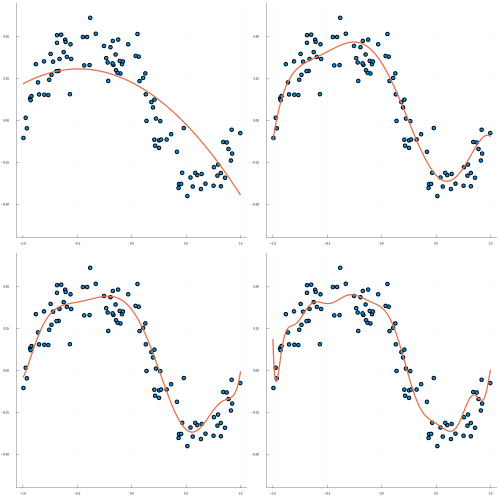

In [354]:
polyeval(theta, x) = vandermonde(x,length(theta))*theta;
t_plot = linspace(-1,1,1000);
using Plots
p = plot(layout=4, legend=false, ylim=(-0.7, 0.7))
scatter!(t, y, subplot=1, markersize = 8, size = (2000, 2000))
plot!(t_plot, linewidth = 5, polyeval(theta2,t_plot), subplot=1)
scatter!(t, y, subplot=2, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta6,t_plot), subplot=2)
scatter!(t, y, subplot=3, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta10,t_plot), subplot=3)
scatter!(t, y, subplot=4, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta15,t_plot), subplot=4)

##### 4. Piecewise-linear fit.

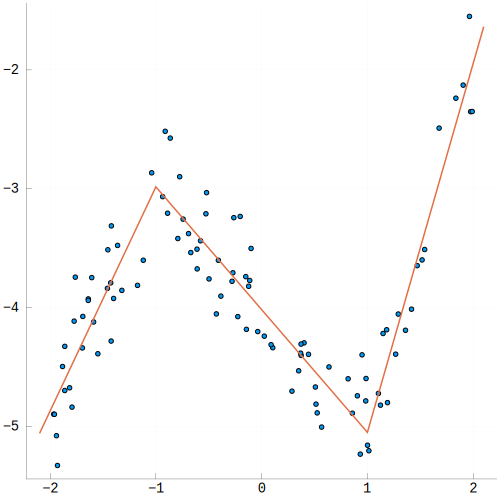

In [364]:
# generate random data
m = 100;
x = -2 .+ 4*rand(m,1);
y = 1 .+ 2*(x.-1) - 3*max.(x.+1,0) + 4*max.(x.-1,0) + 0.3*randn(m,1);
# least squares fitting
theta = [ ones(m)  x   max.(x.+1,0)  max.(x.-1,0) ] \ y;
# plot result
using Plots

t = [-2.1, -1, 1, 2.1]; # cut points (select them explicitly)
yhat = theta[1] .+ theta[2]*t + theta[3]*max.(t.+1,0) + theta[4]*max.(t.-1,0);
scatter(x, y, legend=false, markersize = 10)
plot!(t, yhat, linewidth = 6, size = (2000, 2000),xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"))

##### House price regression.

In [365]:
D = house_sales_data();  # creates 3 vectors: area, beds, price
area = D["area"];
beds = D["beds"];
price = D["price"];
m = length(price);
A = [ones(m) area beds ];  # intercept, area, beds
x = A \ price              # data \ target variable
rms_error = rms(price - A*x)
std_prices = stdev(price)

112.78216159756509

##### 5. Auto-regressive time series model.
$\hat{z}_{t+1} = \theta_1 z_t + \theta_2 z_{t-1} + \dots  + \theta_{M}z_{t-M + 1}$

In [2]:
# import time series of temperatures t
t = temperature_data();
N = length(t)

LoadError: UndefVarError: temperature_data not defined

In [368]:
stdev(t) # Standard deviation 

3.05055928562933

In [77]:
# RMS error for simple predictor zhat_{t+1} = z_t
rms(t[2:end] - t[1:end-1])

1.1602431638206119

In [78]:
# RMS error for simple predictor zhat_{t+1} = z_{t-23}
rms(t[25:end] - t[1:end-24])

1.7338941400468744

In [1]:
# Least squares fit of AR predictor with memory 8
M = 8
y = t[M+1:end];
A = hcat( [ t[i:i+N-M-1] for i = M:-1:1]...);
theta = A \ y;
ypred = A * theta;
 # RMS error of LS AR fit
rms(ypred - y)
# Plot first five days
Nplot = 24*5
scatter(1:Nplot, t[1:Nplot], legend =false, markersize = 10)
plot!(M+1:Nplot, ypred[1:Nplot-M], size = (2000, 2000), linewidth = 6)

LoadError: UndefVarError: t not defined

### 13.2 Validation
### Different polynomial degree

In [414]:
# Generate the test set.
m = 100;
t = -1 .+ 2*rand(m,1);
t_test = -1 .+ 2*rand(m,1);
y = t.^3 - t + 0.4 ./ (1 .+ 25*t.^2) + 0.10*randn(m,1);
y_test = t_test.^3 - t_test + 0.4 ./ (1 .+ 25*t_test.^2) + 0.10*randn(m,1);

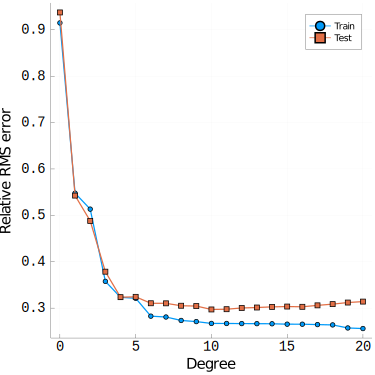

In [415]:
error_train = zeros(21);
error_test = zeros(21);
for p = 1:21  # cganging different degree! on testing and training data
    A = vandermonde(t,p)
    theta = A \ y
    error_train[p] = norm(A*theta - y) / norm(y)
    error_test[p] = norm( vandermonde(t_test, p) * theta - y_test) / norm(y_test);
end
plot(0:20, error_train, label = "Train", marker = :circle, size = (1500, 1500), markersize = 10, linewidth = 5)
plot!(0:20, error_test, label = "Test", marker = :square,markersize = 10, linewidth = 5)
plot!(xlabel="Degree", ylabel = "Relative RMS error", xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

### cross-validation

In [100]:
D = house_sales_data();
price = D["price"];
area = D["area"];
beds = D["beds"];
condo = D["condo"];
location = D["location"];
N = length(price);
X = hcat(ones(N), area, max.(area.-1.5, 0), beds, condo, location .== 2, location .== 3,  location .== 4 );
theta = X \ price

8-element Vector{Float64}:
  115.61682367025573
  175.41314063995847
  -42.74776796782586
  -17.878355235243426
  -19.04472565054657
 -100.91050308608217
 -108.79112222093231
  -24.76524734706235

In [101]:
rms(X*theta - price)  # RMS prediction error

68.34428699036884

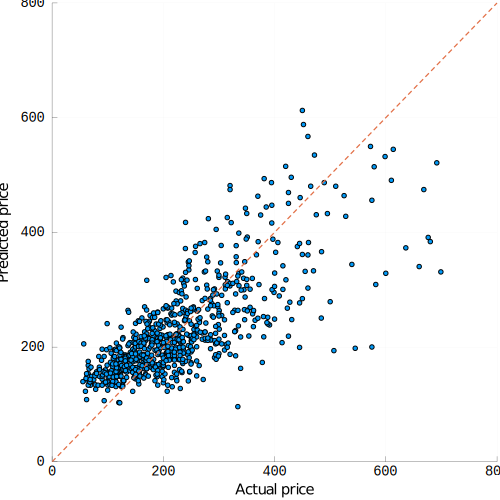

In [449]:
scatter(price, X*theta, lims = (0,800), markersize = 10)
plot!([0, 800], [0, 800], linestyle = :dash, legend = false, linewidth = 5)
plot!(xlims = (0,800), ylims = (0,800), size = (2000,2000))
plot!(xlabel = "Actual price", ylabel = "Predicted price", xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

In [450]:
nfold = div(N,5) # 5 randomly chosen folds

154

In [112]:
import Random;

In [453]:
I = Random.randperm(N);

In [114]:
models = zeros(8,5);  # store 8 coefficients for the 5 models

In [115]:
errors = zeros(2,5);  # prediction errors

In [116]:
for k = 1:5
    if k == 1
        Itrain = I[nfold+1:end]; # seperate the training set and 
        Itest = I[1:nfold];
    elseif k == 5
        Itrain = I[1:4*nfold];
        Itest = I[4*nfold+1:end];
    else
        Itrain = I[ [1:(k-1)*nfold ; k*nfold+1 : N]]
        Itest = I[ [(k-1)*nfold+1 ; k*nfold ]];
    end;
    Ntrain = length(Itrain)
    Ntest = length(Itest)
    theta = X[Itrain,:] \ price[Itrain];
    errors[1,k] = rms(X[Itrain,:] * theta - price[Itrain]);  # training set
    errors[2,k] = rms(X[Itest,:] * theta - price[Itest]);    # testing set
    models[:,k] = theta;
end;

In [117]:
# display the eigth coefficients for each of the 5 folds

In [459]:
using DataFrames
df = DataFrame(fold1 = models[:,1], fold2 = models[:,2], fold3 = models[:,3], fold4 = models[:,4], fold5 = models[:,5])

,fold1,fold2,fold3,fold4,fold5
,Float64,Float64,Float64,Float64,Float64
1,100.839,112.727,111.384,121.76,135.717
2,183.585,178.97,164.838,170.595,178.927
3,-56.4751,-46.4197,-31.0366,-28.5773,-49.809
4,-14.5148,-18.75,-13.9293,-19.2505,-23.3075
5,-3.71595,-22.1154,-19.3014,-25.8322,-24.4529
6,-107.907,-98.4648,-96.2676,-96.6855,-108.556
7,-116.876,-108.826,-104.44,-103.682,-113.504
8,-33.9957,-21.1865,-17.7889,-24.7715,-30.4715


In [119]:
# display training errors (1st row) and test errors (2nd row)

In [460]:
errors # for training and testing for all the 5 model folds

5×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

# Chapter 14 Least squares classification

What does classification mean here? 

e.g., TRUE/ FALSE responses; other labels

##### 14.1 Classification

In [121]:
tf2pm1(b) = 2*b-1

tf2pm1 (generic function with 1 method)

In [122]:
b = true

true

In [123]:
tf2pm1(b)

1

In [124]:
b = false

false

In [125]:
tf2pm1(b)

-1

In [126]:
b = [ true, false, true ]

3-element Vector{Bool}:
 1
 0
 1

In [127]:
tf2pm1.(b)

3-element Vector{Int64}:
  1
 -1
  1

##### Confusion matrix.

$\quad \quad \quad \quad \quad $ prediction


$\quad \quad \quad \quad$ y_hat = 1 y_hat =0

outcome

y = 1 $\quad \quad \quad $  tp $\quad \quad \quad $ nf

y = 0    $\quad \quad \quad $     np  $\quad \quad \quad $      tn

In [2]:
# Count errors and correct predictions
Ntp(y,yhat) = sum( (y .== true) .& (yhat .== true) );
Nfn(y,yhat) = sum( (y .== true) .& (yhat .== false) );
Nfp(y,yhat) = sum( (y .== false) .& (yhat .== true) );
Ntn(y,yhat) = sum( (y .== false) .& (yhat .== false) );
error_rate(y,yhat) = (Nfn(y,yhat) + Nfp(y,yhat)) / length(y);
confusion_matrix(y,yhat) = [ Ntp(y,yhat) Nfn(y,yhat); Nfp(y,yhat) Ntn(y,yhat) ];

In [6]:
y = rand(Bool,100);     # actual group
yhat = rand(Bool,100);  # predicted group

In [7]:
confusion_matrix(y,yhat)
# tp fn
# fp tn

2×2 Matrix{Int64}:
 19  26
 29  26

In [8]:
error_rate(y,yhat) # fp + fn / total

0.55

##### 14.2 Least squares classifier

In [138]:
ftilde(x) = x'*beta .+ v  # Regression model

ftilde (generic function with 1 method)

In [139]:
fhat(x) = ftilde(x) > 0   # Regression classifier

fhat (generic function with 1 method)

##### Iris flower classification.
There are four variables for each flower

x1 is the sepal length in cm

x2 is the sepal width in cm

x3 is the petal length in cm

x4 is the petal width in cm

In [21]:
using VMLS
D = iris_data();

# Create 150x4 data matrix
iris = vcat(D["setosa"], D["versicolor"], D["virginica"])

# y[k] is true (1) if virginica, false (0) otherwise
y = [ zeros(Bool, 50); zeros(Bool, 50); ones(Bool, 50) ];
A = [ ones(150) iris ]
theta = A \ (2*y .- 1)   # to 1 and -1

5-element Vector{Float64}:
 -2.3905637266512043
 -0.09175216910134579
  0.4055367711191057
  0.007975822012793829
  1.1035586498675736

In [22]:
yhat = A*theta .> 0;

In [23]:
C = confusion_matrix(y, yhat)

2×2 Matrix{Int64}:
 46   4
  7  93

In [24]:
err_rate = (C[1,2] + C[2,1]) / length(y)

0.07333333333333333

In [25]:
avg(y .!= yhat)

0.07333333333333333

### 14.3 Multi-class classifiers

can also construct a confuison matrix with multiple classifiers

In [16]:
error_rate(y, yhat) = avg(y .!= yhat);

In [27]:
function confusion_matrix(y, yhat, K)
C = zeros(K,K)
for i in 1:K 
    for j in 1:K
        C[i,j] = sum((y .== i) .& (yhat .== j))
    end 
end
return C
end;

In [28]:
 # test for K=4 on random vectors of length 100

In [29]:
K = 4

4

In [30]:
y = rand(1:K, 100);  yhat = rand(1:K, 100);  # actual and predict

In [31]:
C = confusion_matrix(y, yhat, K)

4×4 Matrix{Float64}:
 5.0  10.0  9.0  8.0
 5.0   7.0  3.0  3.0
 8.0   9.0  6.0  1.0
 8.0   5.0  5.0  8.0

In [32]:
using LinearAlgebra
error_rate(y, yhat),  1-sum(diag(C))/sum(C)

(0.74, 0.74)

##### Least squares multi-class classifier.

In [44]:
row_argmax(u) = [ argmax(u[i,:]) for i = 1:size(u,1) ]

row_argmax1 (generic function with 1 method)

In [34]:
A = randn(4,5)

4×5 Matrix{Float64}:
  0.0627167   1.17727   -0.257532  1.67187    0.988601
  0.506322    0.881164   0.389101  0.88114    1.08561
 -0.795975    0.87191   -0.553882  0.987256   0.340643
 -1.16137    -0.314038   0.382329  0.726526  -0.141164

In [35]:
 row_argmax(A)

4-element Vector{Int64}:
 4
 5
 4
 4

In [36]:
fhat(X,Theta) = row_argmax(X'*Theta)

fhat (generic function with 1 method)

##### Matrix least squares.

In [39]:
function one_hot(ycl,K)
N = length(ycl)
Y = zeros(N,K)
for j in 1:K
    Y[findall(ycl .== j), j] .= 1
end
return Y
end;

In [40]:
K = 4;
ycl = rand(1:K,6)

6-element Vector{Int64}:
 2
 1
 1
 2
 4
 2

In [43]:
Y = one_hot(ycl, K)

6×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0

In [44]:
 2*Y .- 1

6×4 Matrix{Float64}:
 -1.0   1.0  -1.0  -1.0
  1.0  -1.0  -1.0  -1.0
  1.0  -1.0  -1.0  -1.0
 -1.0   1.0  -1.0  -1.0
 -1.0  -1.0  -1.0   1.0
 -1.0   1.0  -1.0  -1.0

In [45]:
function ls_multiclass(X,ycl,K)
n, N = size(X)
Theta = X' \ (2*one_hot(ycl,K) .- 1)
yhat = row_argmax(X'*theta)
return Theta, yhat
end

ls_multiclass (generic function with 1 method)

##### Iris flower classification.

In [1]:
using VMLS
D = iris_data();
setosa = D["setosa"];
versicolor = D["versicolor"];
virginica = D["virginica"];

In [2]:
# pick three random permutations of 1,..., 50
using Random
I1 = Random.randperm(50);
I2 = Random.randperm(50);
I3 = Random.randperm(50);

In [3]:
# training set is 40 randomly picked examples per class

In [4]:
Xtrain = [ setosa[I1[1:40],:];
    versicolor[I2[1:40],:];
    virginica[I3[1:40],:] ]';  # 4x120 data matrix

In [5]:
# add constant feature one

In [6]:
Xtrain = [ ones(1,120); Xtrain ];  # 5x120 data matrix ones + 4 variables

In [7]:
ytrain = [ ones(40); 2*ones(40); 3*ones(40) ];

In [8]:
# test set is remaining 10 examples for each class

In [9]:
Xtest = [setosa[I1[41:end], :];
    versicolor[I2[41:end],:];
    virginica[I3[41:end],:] ]';
Xtest = [ ones(1,30); Xtest ]
ytest = [ones(10); 2*ones(10); 3*ones(10)];

In [12]:
function ls_multiclass(X,ycl,K)
       n, N = size(X)
       Theta = X' \ (2*one_hot(ycl,K) .- 1) # to 1 and -1
       yhat = row_argmax(X'*Theta)          # the one that fits the most (1)
return Theta, yhat
end

ls_multiclass (generic function with 1 method)

In [13]:
Theta, yhat = ls_multiclass(Xtrain, ytrain, 3);

In [14]:
Ctrain = confusion_matrix(ytrain, yhat, 3)

3×3 Matrix{Float64}:
 40.0   0.0   0.0
  0.0  29.0  11.0
  0.0   7.0  33.0

In [17]:
error_train =  error_rate(ytrain, yhat)

0.15

In [19]:
yhat = row_argmax(Xtest'*Theta);

In [20]:
Ctest = confusion_matrix(ytest, yhat, 3)

3×3 Matrix{Float64}:
 10.0  0.0  0.0
  0.0  8.0  2.0
  0.0  2.0  8.0

In [21]:
error_test =  error_rate(ytest, yhat)

0.13333333333333333

# Chapter 15 Multi-objective least squares


##### 15.1 Multi-objective least squares
$J = \lambda_1 J_1 +  \dots + \lambda_k J_k
 = \lambda_1 ||A_1x_1 - b_1||^2 + \dots + \lambda_k ||A_kx_k - b_k||^2 = ||\tilde{A}x - \tilde{b}||^2$
 
 $\tilde{A} = [\sqrt{\lambda_1}A_1 \dots \sqrt{\lambda_k}A_k]^\top$
 
 $\tilde{b} = [\sqrt{\lambda_1}b_1 \dots \sqrt{\lambda_k}b_k]^\top$

In [123]:
# Help you to solve 
function mols_solve(As,bs,lambdas)
       k = length(lambdas);
       Atil = vcat([sqrt(lambdas[i])*As[i] for i=1:k]...)
       btil = vcat([sqrt(lambdas[i])*bs[i] for i=1:k]...)
       return Atil \ btil
       end

mols_solve (generic function with 1 method)

#####  Simple example.

This example is with only two objectives. So, only need one lambda!

In [125]:
As = [randn(10,5), randn(10,5)];
bs = [randn(10), randn(10)];
N = 200;
lambdas = 10 .^ linspace(-4,4,200);
x = zeros(5,N); # 5 variables
J1 = zeros(N); 
J2 = zeros(N); 

In [126]:
for k = 1:N
    x[:,k] = mols_solve(As, bs, [1, lambdas[k]])
    J1[k] = norm(As[1]*x[:,k] - bs[1])^2
    J2[k] = norm(As[2]*x[:,k] - bs[2])^2
end;

In [95]:
 # plot solution versus lambda

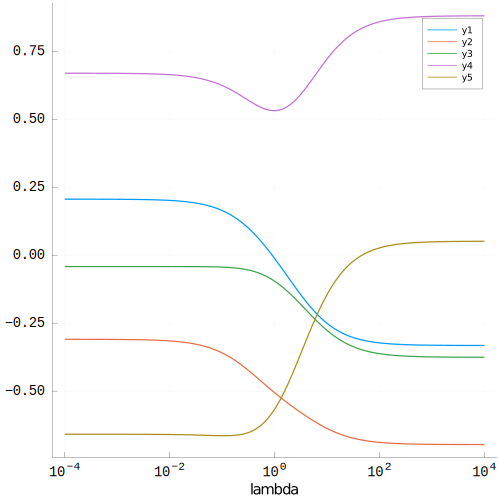

In [105]:
using Plots
plot(lambdas, x', xscale = :log10, xlabel = "lambda", size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

# The different parameter values found using different lambda

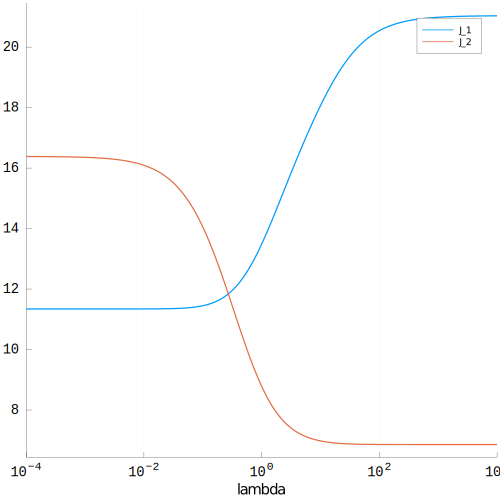

In [114]:
# plot two objectives versus lambda
plot(lambdas, J1, xscale = :log10, label = "J_1", linewidth = 5);
plot!(lambdas, J2, label = "J_2", xlabel = "lambda", xlims = (1e-4,1e4), size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

# The two objective values

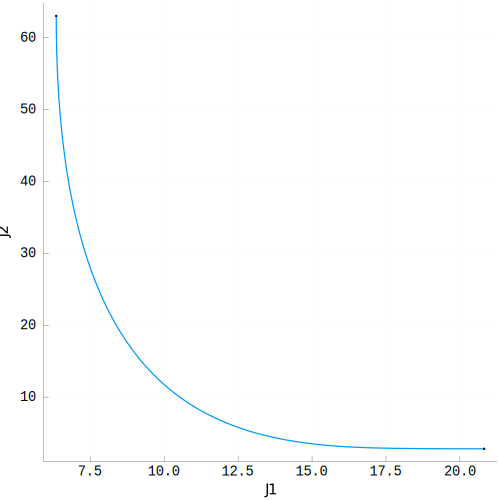

In [127]:
# plot trade-off curve
plot(J1, J2, xlabel="J1", ylabel = "J2", legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
# add (single-objective) end points to trade-off curve
x1 = As[1] \ bs[1];
x2 = As[2] \ bs[2];
J1 = [norm(As[1]*x1-bs[1])^2, norm(As[1]*x2-bs[1])^2];
J2 = [norm(As[2]*x1-bs[2])^2, norm(As[2]*x2-bs[2])^2];
scatter!(J1,J2)

### 15.3 Estimation and inversion
### Estimating a periodic time series

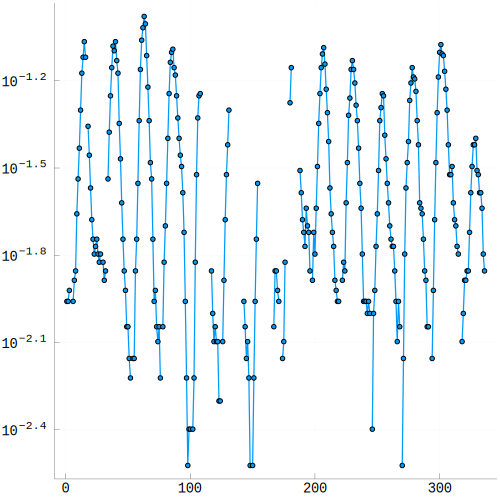

In [27]:
using Plots
ozone = ozone_data();  # a vector of length 14*24 = 336
k = 14;  N = k*24;
plot(1:N, ozone, yscale = :log10, marker = :circle, markersize = 10, legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))


##### Smoothing

What does smooth mean?

We do this by minimizing $||Ax - y||^2 + \lambda ||D^{circ} x ||^2,$

where $D^{circ} = [-1, 1, 0 ...; 0, -1, 1, 0, ...]$

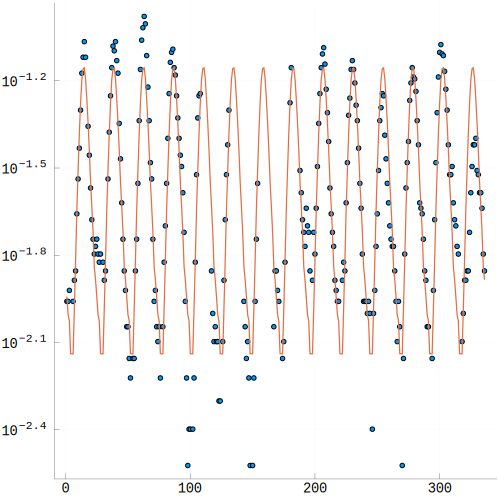

In [32]:
A = vcat( [eye(24) for i = 1:k]...)
# periodic difference matrix
D = -eye(24) + [zeros(23,1) eye(23); 1  zeros(1,23)];
ind = [k for k in 1:length(ozone) if !isnan(ozone[k])];

As = [A[ind,:], D]
bs = [log.(ozone[ind]), zeros(24)]

# solution for lambda = 1
x = mols_solve( As, bs, [1, 1])
scatter(1:N, ozone, yscale = :log10,markersize = 10, legend=false,  size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
plot!(1:N, vcat([exp.(x) for i = 1:k]...), linewidth = 5)


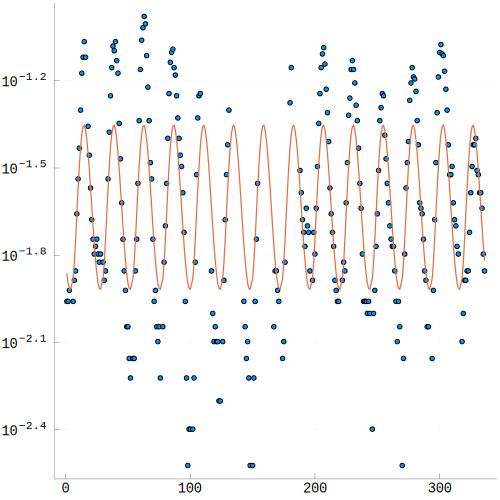

In [33]:
# solution for lambda = 100
x = mols_solve( As, bs, [1, 100]) # 1: for ||Ax - y||^2, 100: for ||Dx||^2
scatter(1:N, ozone, yscale = :log10, markersize = 10, legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
plot!(1:N, vcat([exp.(x) for i = 1:k]...), linewidth = 5)


### 15.4 Regularized data fitting
We fit the data using $\hat{f}(x) = \theta_1 + \sum_{k = 1}^4 \theta_{k + 1} sin(\omega_{k}x + \phi_{k})$

And we have the vealues of $\omega_{1}, \omega_{2}, \omega_{3}, \omega_{4}$

and the values of $\phi_{1}, \phi_{2}, \phi_{3}, \phi_{4}$.

Need to estimate $\theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}$.

In [137]:
# Import data as vectors xtrain, ytrain, xtest, ytest
D = regularized_fit_data();
xtrain = D["xtrain"];  ytrain = D["ytrain"];
xtest = D["xtest"];  ytest = D["ytest"];
N = length(ytrain);
Ntest = length(ytest);
p = 5;

omega = [ 13.69; 3.55; 23.25; 6.03 ];
phi = [ 0.21; 0.02; -1.87; 1.72 ];

A = hcat(ones(N), sin.(xtrain*omega' + ones(N)*phi'));
Atest = hcat(ones(Ntest), sin.(xtest*omega' + ones(Ntest)*phi'));

npts = 100;

lambdas = 10 .^ linspace(-6,6,npts);

err_train = zeros(npts);
err_test = zeros(npts);
thetas = zeros(p,npts);

In [138]:
# run the model using different lambda values (you have 100 of them)
for k = 1:npts
       theta = mols_solve([ A, [zeros(p-1) eye(p-1)]], [ ytrain, zeros(p-1) ], [1, lambdas[k]])
       err_train[k] = rms(ytrain - A*theta);
       err_test[k] = rms(ytest - Atest*theta);
       thetas[:,k] = theta;
    end;

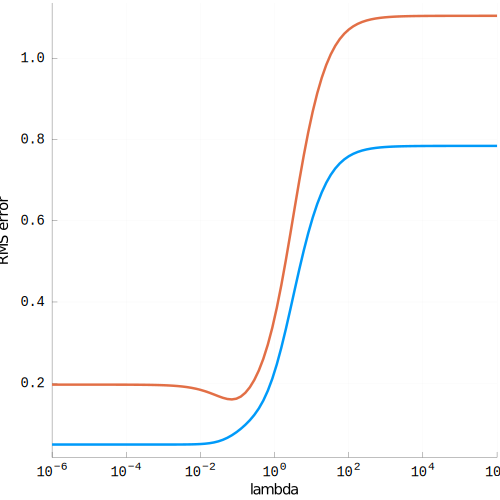

In [147]:
using Plots
# Plot RMS errors
plot(lambdas, err_train, xscale = :log10, label = "Train", linewidth = 10)
plot!(lambdas, err_test, xscale = :log10, label = "Test", linewidth = 10)
plot!(xlabel = "lambda", ylabel = "RMS error", xlim = (1e-6, 1e6), markersize = 10, legend=false, 

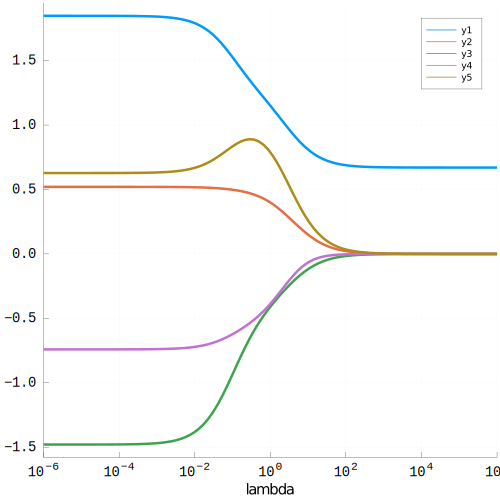

In [149]:
# Plot coefficients
plot(lambdas, thetas', xscale = :log10,  linewidth = 10)
plot!(xlabel = "lambda", xlim = (1e-6, 1e6), size = (2000, 2000),  xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))